# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [139]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [140]:
billboard = pd.read_csv('/Users/lesliepham/Desktop/DSI_SM_01/curriculum/week-02/2.4-lab/assets/datasets/billboard.csv')

##### Write a brief description of your data, and any interesting observations you've made thus far. 

Interesting observations that I have made of my data thus far are that the values given are song title as well as artist, track time, year the information was taken, date the song entered the billboard list, date the song peaked, and a count of how many weeks each song lasted with its rank.

In [141]:
billboard[['x1st.week']].apply(pd.to_numeric) #changed x1stweek type to int.
del billboard['year'] #all values for year are 2000. Deleted unnecessary column.


In [85]:
billboard.dtypes.head()

artist.inverted    object
track              object
time               object
genre              object
date.entered       object
dtype: object

In [90]:
NaNcount = billboard.ix[:,6:len(billboard.columns)]
NaNcount #printing just the rankings per week

,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,59,52.0,43.0,30.0,29.0,22.0,15.0,10.0,10.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,83,83.0,44.0,38.0,16.0,13.0,16.0,16.0,16.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,63,45.0,34.0,23.0,17.0,12.0,9.0,8.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,77,66.0,61.0,61.0,61.0,55.0,2.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,81,54.0,44.0,39.0,38.0,33.0,29.0,29.0,32.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
NaNcount.apply(np.sum, axis = 0).tail(20) #shows that no songs made it past week 65.

x57th.week     55.0
x58th.week     63.0
x59th.week     71.0
x60th.week     76.0
x61st.week     85.0
x62nd.week     89.0
x63rd.week     95.0
x64th.week    100.0
x65th.week     49.0
x66th.week      0.0
x67th.week      0.0
x68th.week      0.0
x69th.week      0.0
x70th.week      0.0
x71st.week      0.0
x72nd.week      0.0
x73rd.week      0.0
x74th.week      0.0
x75th.week      0.0
x76th.week      0.0
dtype: float64

In [96]:
genres = pd.value_counts(billboard['genre'])
genres #prints how many songs there are of each genre.


Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

In [128]:
artist_track =pd.pivot_table(billboard, index=['artist.inverted', 'track', 'genre'])
weeks = pd.DataFrame(artist_track.notnull().sum(axis=1)) #total weeks each track was on billboard
weeks.columns = ['weeks.on.billboard'] #creates a column of the total weeks on billboard.
weeks_sorted= weeks.sort('weeks.on.billboard', ascending=False) #sorts values from largest to smallest.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [168]:
weeks_sorted.head(10)

,,,weeks.on.billboard
artist.inverted,track,genre,
Creed,Higher,Rock,57
Lonestar,Amazed,Country,55
"Hill, Faith",Breathe,Rap,53
3 Doors Down,Kryptonite,Rock,53
Creed,With Arms Wide Open,Rock,47
Joe,I Wanna Know,Rock,44
Vertical Horizon,Everything You Want,Rock,41
matchbox twenty,Bent,Rock,39
"Braxton, Toni",He Wasn't Man Enough,Rock,37


## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. Explain your rationale for the way you choose to "impute" the missing data.

In [146]:
billboard.fillna(value=0) #fill NaN with 0

,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,61.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,81,54.0,44.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [157]:
pd.melt(weeks_sorted)

,variable,value
0,weeks.on.billboard,57
1,weeks.on.billboard,55
2,weeks.on.billboard,53
3,weeks.on.billboard,53
4,weeks.on.billboard,47
5,weeks.on.billboard,44
6,weeks.on.billboard,41
7,weeks.on.billboard,39
8,weeks.on.billboard,37
9,weeks.on.billboard,34


## Step 3: Visualize your data.

##### Using a plotting utility of your choice (Tableau or python modules or both), create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

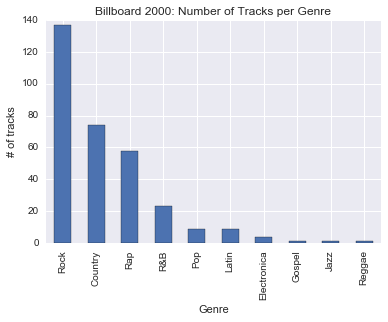

In [125]:
genres.plot(kind='bar').set(title='Billboard 2000: Number of Tracks per Genre', xlabel='Genre', ylabel='# of tracks')

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

Although there are more Country tracks than Rap tracks, Rap tracks last longer on Billboard.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

-Clean data to find total weeks each track is on Billboard.
-Group by Genre
-Find the statistics (min, max, mean) for each genre.
-Compare values.

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for a minimum of 500 words. 

In [ ]:
https://lesliepham.wordpress.com/2016/06/20/5-steps-to-analyzing-data/

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 500 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 